**Đọc, Kiểm tra dữ liệu**


In [1]:
import pandas as pd
link = "https://drive.google.com/file/d/1jnyDD_KVesjmuVPEFKthkcgNZ6QOcqCt/view?usp=drive_link"
path='https://drive.google.com/uc?id=1jnyDD_KVesjmuVPEFKthkcgNZ6QOcqCt'
# Convention của google Collab

df = pd.read_csv(path) #Đọc file csv

In [2]:
df

,Unnamed: 0,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...,...
622,622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [5]:
display(df.describe())
display(df.describe(exclude=[float,int]))

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


,sex,class,deck,embark_town,alone
count,627,627,627,627,627
unique,2,3,8,4,2
top,male,Third,unknown,Southampton,y
freq,410,341,481,450,372


In [6]:
df.isnull().sum() #Kiểm tra null

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [7]:
df.isna().sum() #Kiểm tra lỗi

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [8]:
df.duplicated().sum() #Kiểm tra trùng lặp dữ liệu

69

In [9]:
df['survived'].value_counts()

survived
0    384
1    243
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Third     341
First     159
Second    127
Name: count, dtype: int64

In [11]:
df['sex'].value_counts()

sex
male      410
female    217
Name: count, dtype: int64

**Vẽ một số biểu đồ để phân tích dữ liệu**

In [12]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn

In [13]:
fig = px.bar(df, x='survived', y='class', title='Total survived by sex and class',color='class')
fig

[Text(0, 0, '384'), Text(0, 0, '243')]

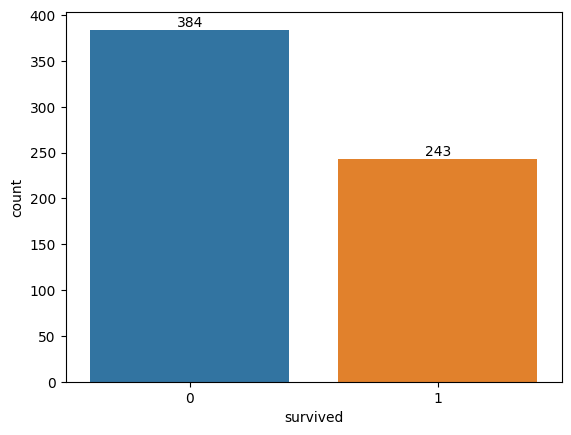

In [14]:
ax = sn.countplot(x='survived', data = df)
ax.bar_label(ax.containers[0])
#Kiểm tra độ balance của dữ liệu

Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ["sex","class","deck","embark_town","alone"]
for cols in col:
  print("*"*50)
  print(df[cols].unique())
  df[cols] = le.fit_transform(df[cols])
  print(df[cols].unique())

**************************************************
['male' 'female']
[1 0]
**************************************************
['Third' 'First' 'Second']
[2 0 1]
**************************************************
['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
[7 2 6 0 1 3 5 4]
**************************************************
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
[2 0 1 3]
**************************************************
['n' 'y']
[0 1]


In [16]:
df

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22.0,1,0,7.2500,2,7,2,0
1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,0,26.0,0,0,7.9250,2,7,2,1
3,1,0,35.0,1,0,53.1000,0,2,2,0
4,0,1,28.0,0,0,8.4583,2,7,1,1
...,...,...,...,...,...,...,...,...,...,...
622,0,1,28.0,0,0,10.5000,1,7,2,1
623,0,1,25.0,0,0,7.0500,2,7,2,1
624,1,0,19.0,0,0,30.0000,0,1,2,1
625,0,0,28.0,1,2,23.4500,2,7,2,0


Vẽ biểu đồ nhiệt thể hiện ma trận tương quan

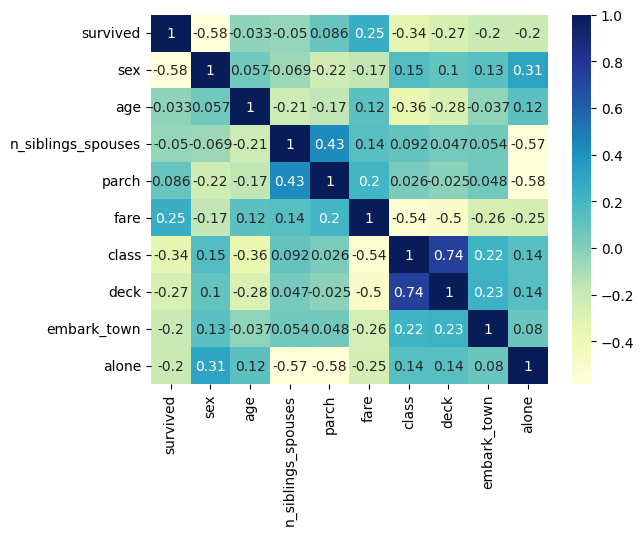

In [17]:
hm = sn.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'n_siblings_spouses'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'deck'}>,
        <Axes: title={'center': 'embark_town'}>],
       [<Axes: title={'center': 'alone'}>, <Axes: >, <Axes: >]],
      dtype=object)

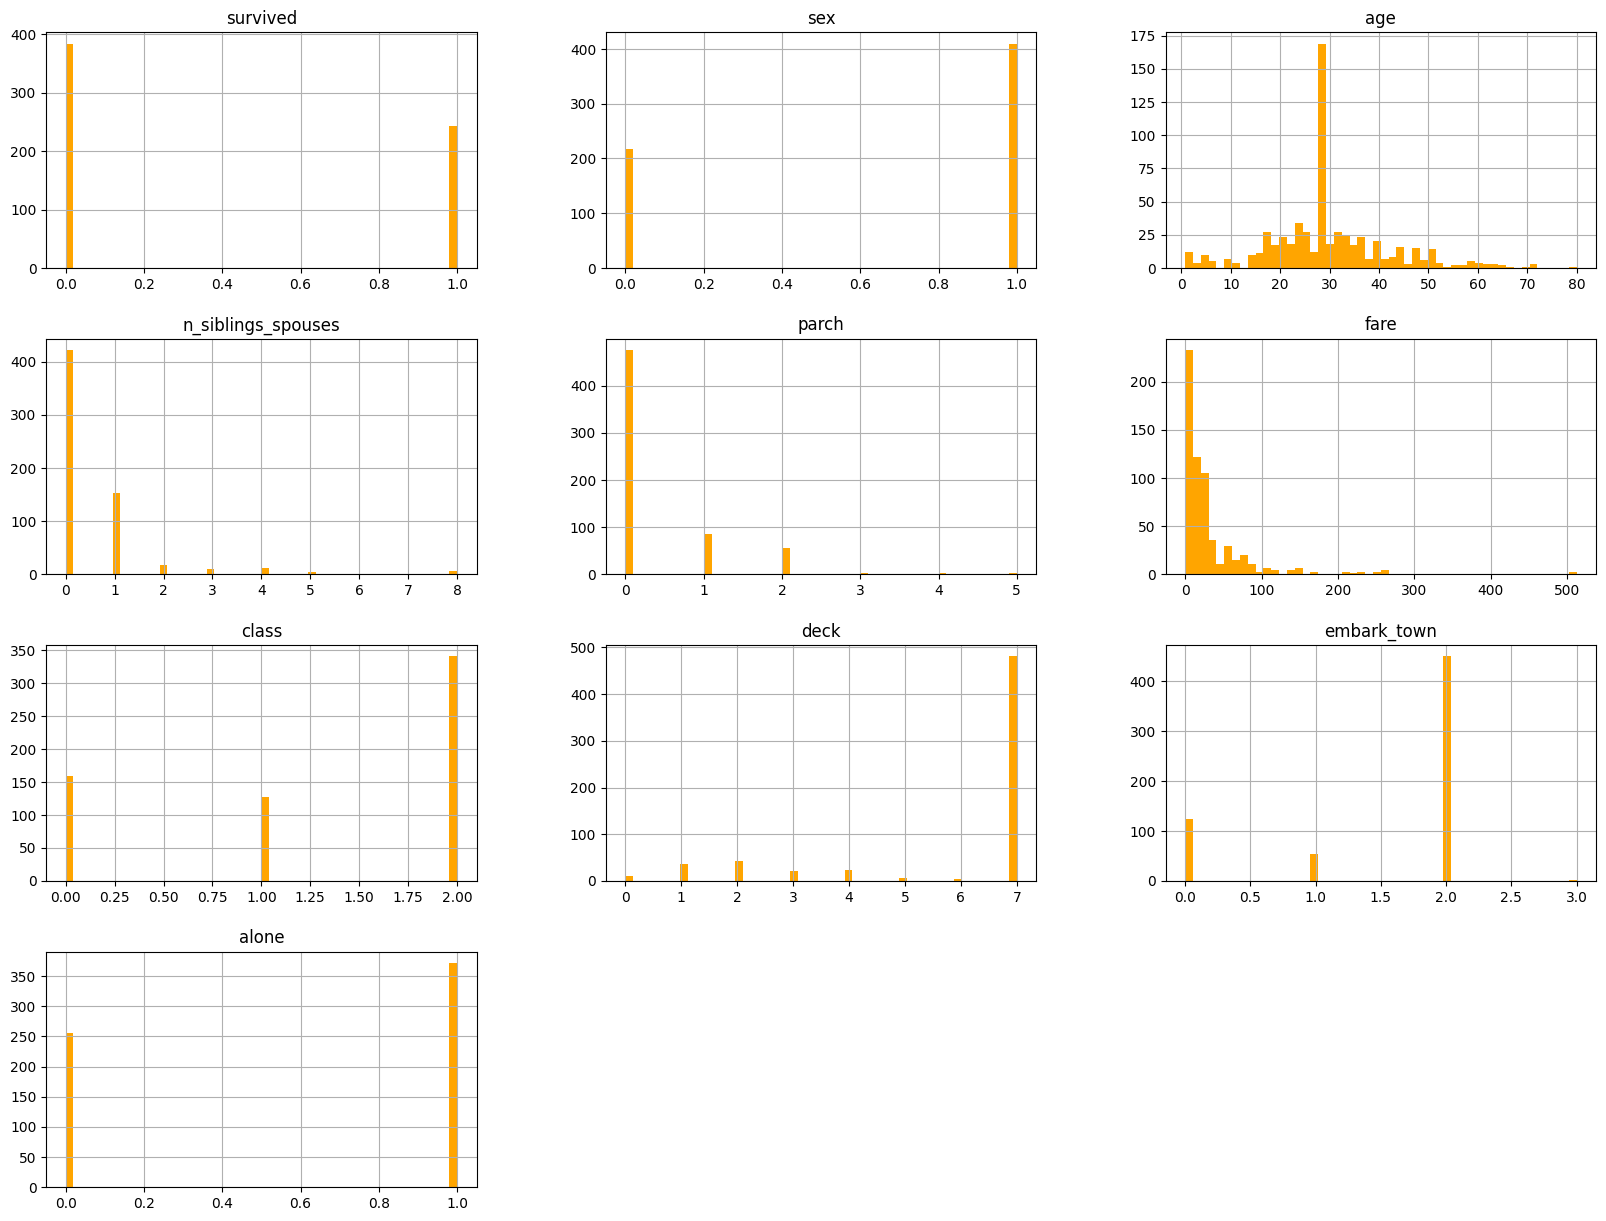

In [18]:
df.hist(bins=50,figsize=(20,15),color="orange")

array([[<Axes: xlabel='survived', ylabel='survived'>,
        <Axes: xlabel='sex', ylabel='survived'>,
        <Axes: xlabel='age', ylabel='survived'>,
        <Axes: xlabel='n_siblings_spouses', ylabel='survived'>,
        <Axes: xlabel='parch', ylabel='survived'>,
        <Axes: xlabel='fare', ylabel='survived'>,
        <Axes: xlabel='class', ylabel='survived'>,
        <Axes: xlabel='deck', ylabel='survived'>,
        <Axes: xlabel='embark_town', ylabel='survived'>,
        <Axes: xlabel='alone', ylabel='survived'>],
       [<Axes: xlabel='survived', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='n_siblings_spouses', ylabel='sex'>,
        <Axes: xlabel='parch', ylabel='sex'>,
        <Axes: xlabel='fare', ylabel='sex'>,
        <Axes: xlabel='class', ylabel='sex'>,
        <Axes: xlabel='deck', ylabel='sex'>,
        <Axes: xlabel='embark_town', ylabel='sex'>,
        <Axes: xlabel='alone', ylabel='sex'

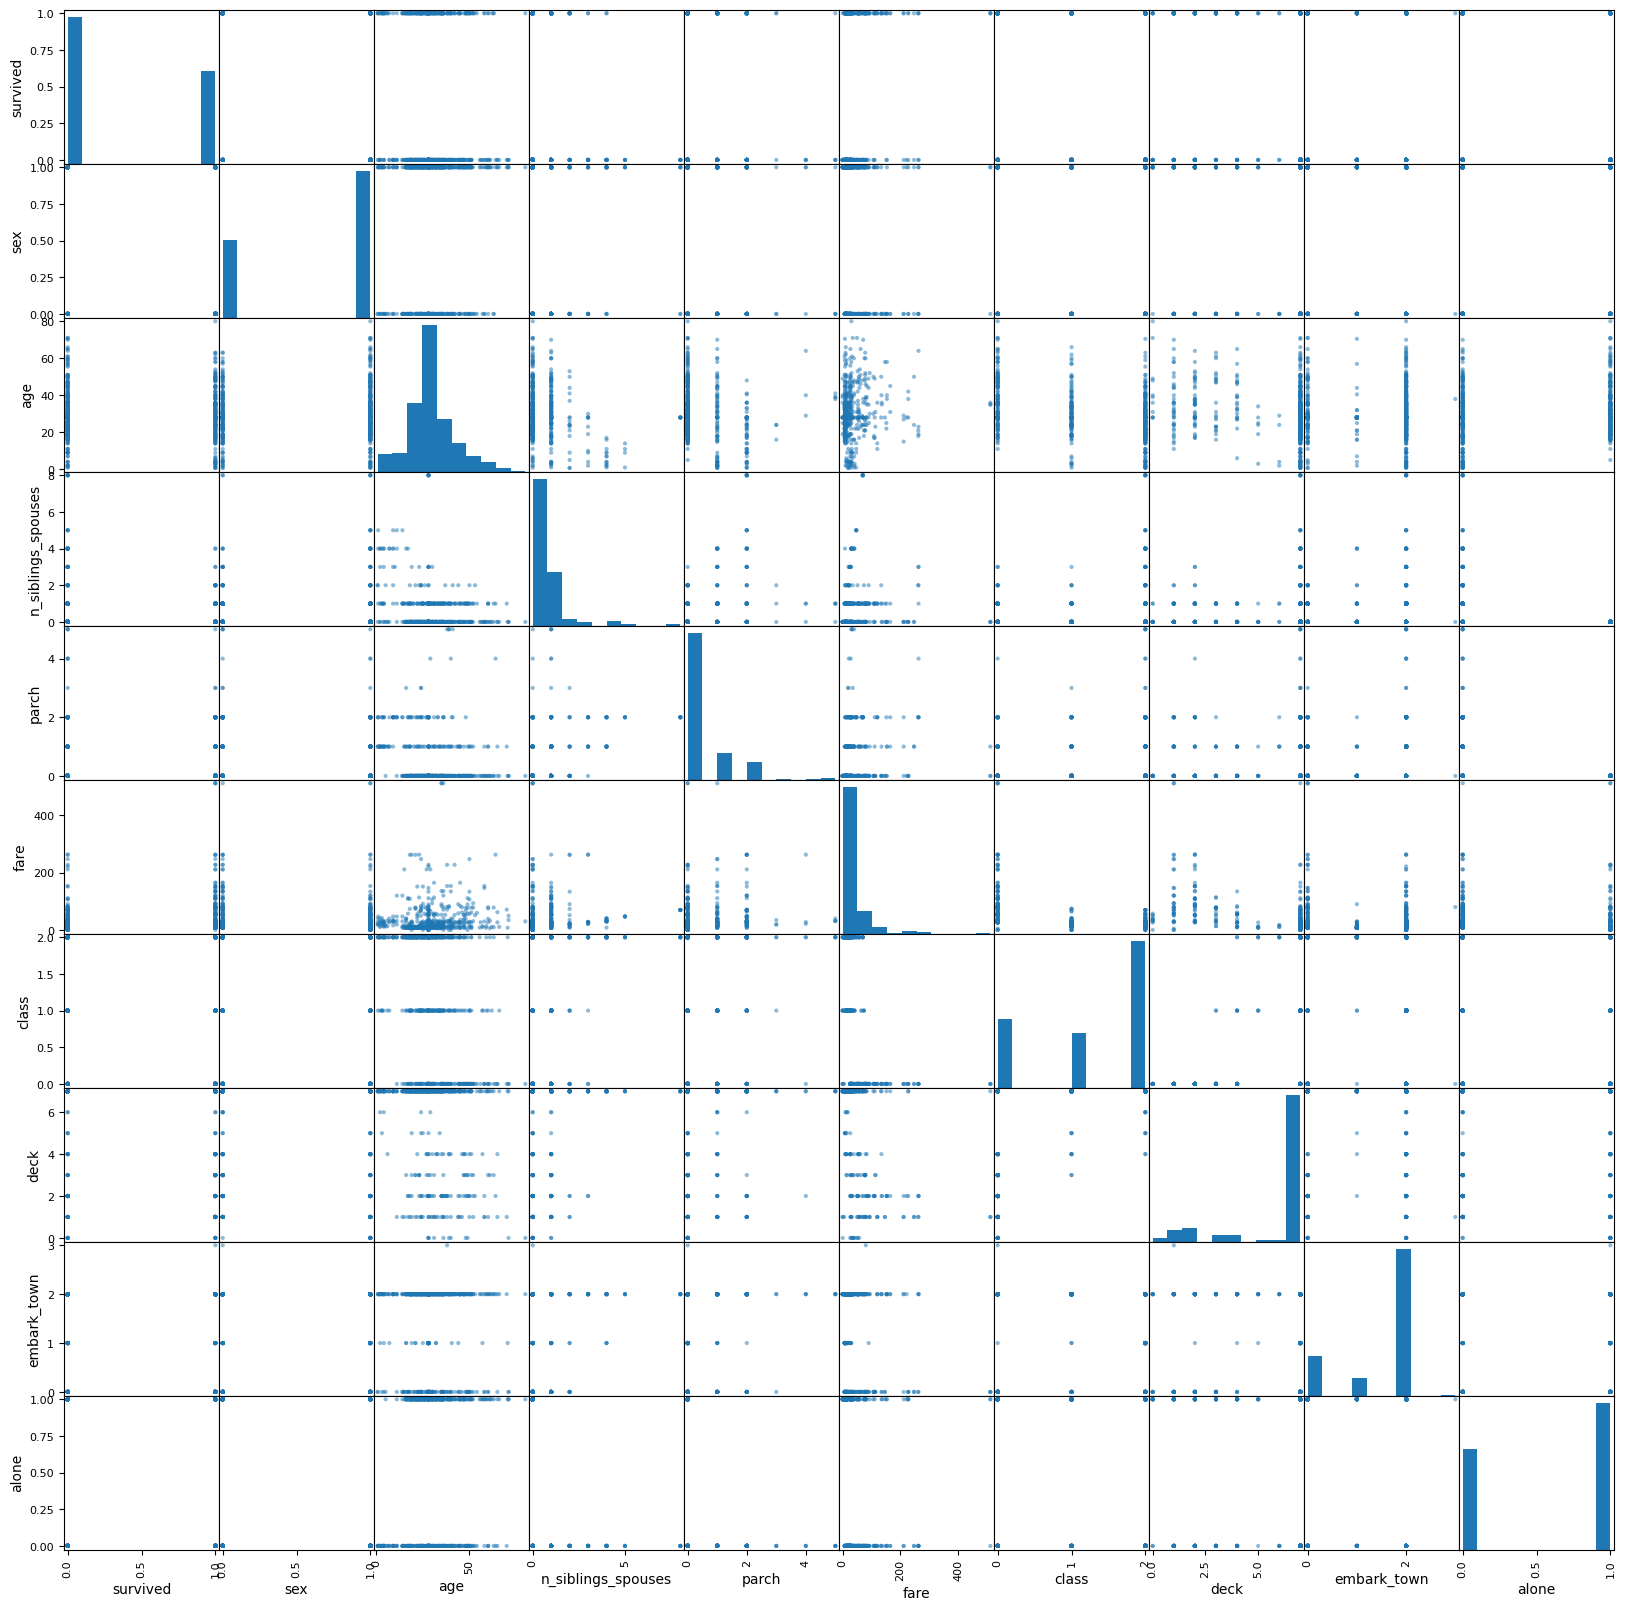

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20, 20))

Chia dữ liệu thành 2 tệp train test theo tỉ lệ thích hợp
---



Decision Tree Classifier

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['survived'], axis='columns'),df.survived,train_size=0.7,random_state=50)


In [21]:
x_train

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
522,1,28.0,0,0,7.8958,2,7,2,1
166,1,20.5,0,0,7.2500,2,7,2,1
398,0,22.0,0,0,7.7750,2,7,2,1
478,1,31.0,0,0,13.0000,1,7,2,1
305,1,21.0,0,0,7.7333,2,7,1,1
...,...,...,...,...,...,...,...,...,...
70,1,24.0,0,0,8.0500,2,7,2,1
132,0,28.0,8,2,69.5500,2,7,2,0
289,1,39.0,0,0,7.9250,2,7,2,1
109,1,19.0,0,0,6.7500,2,7,1,1


In [22]:
x_test

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
148,1,28.0,8,2,69.5500,2,7,2,0
488,1,18.0,0,0,7.7958,2,7,2,1
2,0,26.0,0,0,7.9250,2,7,2,1
145,0,28.0,0,0,7.7500,2,7,1,1
232,1,22.0,0,0,7.2500,2,7,2,1
...,...,...,...,...,...,...,...,...,...
438,0,28.0,1,0,15.5000,2,7,1,0
460,1,48.0,1,0,76.7292,0,3,0,0
243,1,29.0,1,0,66.6000,0,2,2,0
29,1,28.0,0,0,7.2292,2,7,0,1


In [23]:
y_train

522    0
166    0
398    1
478    1
305    0
      ..
70     0
132    0
289    1
109    0
480    0
Name: survived, Length: 438, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=11, max_features=11, min_samples_leaf=4)
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, max_features=11, min_samples_leaf=4)

In [25]:
y_pred = model_tree.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

**Evaluate Model**

In [26]:
y_test_pred = model_tree.predict_proba(x_test) #Tính xác suất dự đoán của y_test threshold
y_test_pred[:10]

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [0.75 , 0.25 ],
       [0.125, 0.875],
       [1.   , 0.   ],
       [0.25 , 0.75 ],
       [0.   , 1.   ],
       [0.8  , 0.2  ],
       [0.   , 1.   ],
       [1.   , 0.   ]])

Accuracy of train is : 0.8858447488584474


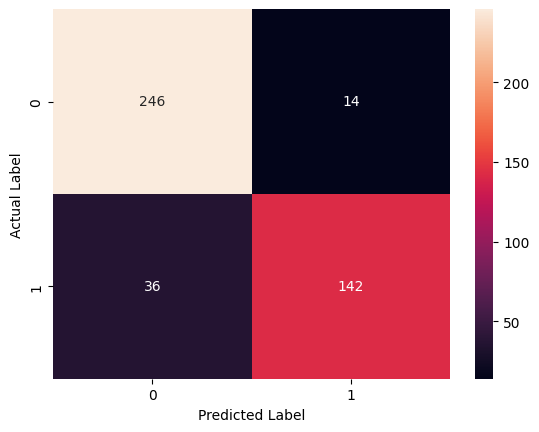

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = model_tree.predict(x_train)
y_train_pred
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy of train is : {}".format(acc))

cm = confusion_matrix(y_train, y_train_pred)
sn.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Accuracy of test is : 0.8201058201058201


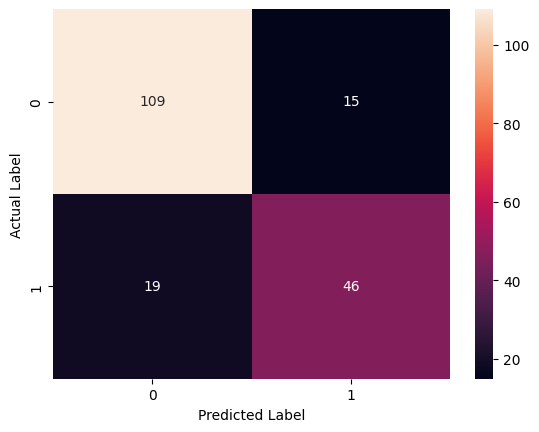

In [28]:
y_test_pred = model_tree.predict(x_test)
y_test_pred
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of test is : {}".format(acc))
#Cthuc là Ac_score = TP+TN/TP+TN+FP+FN (Độ dự đoán chính xác/Tổng) (Đoán chính xác/sống sót)+(Đoán chính xác/Chết)/Tổng = 109+46/tất cả
#Dự đoán: Sống/Chết  true/false
#Thực tế: Chết/Sống sót Nega/Pos
cm = confusion_matrix(y_test, y_test_pred)
sn.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [29]:
y_pred = model_tree.predict([[1,28,0,1,60,1,2,2,0],[0,60,6,1,15,2,2,2,1],[0,18,0,1,160,0,2,2,0]])
y_pred

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([1, 0, 1], dtype=int64)

Mô hình dự đoán nam tỉ lệ sống sót thấp hơn nữ. Những người có tuổi thấp, số lượng người thân thấp, giá vé cao sẽ có tỉ lệ sống sót cao hơn.

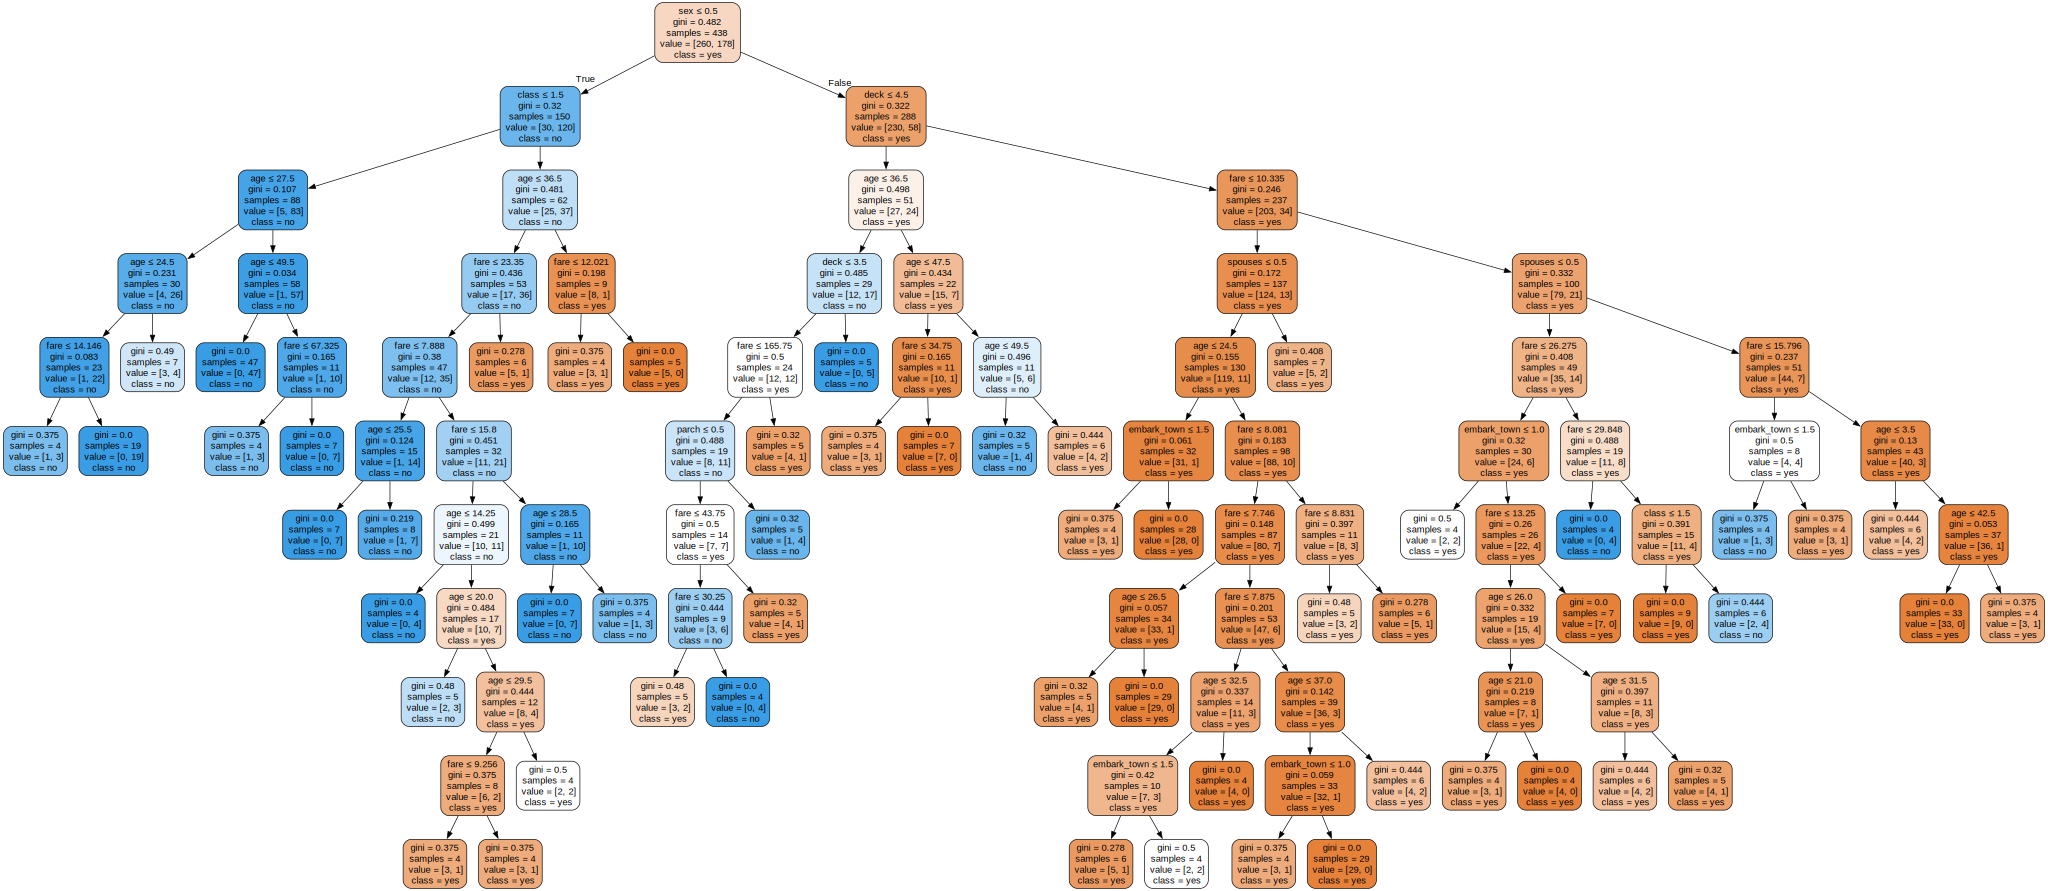

In [30]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model_tree,out_file=None,feature_names=["sex","age","spouses","parch","fare","class","deck","embark_town","alone"],class_names=["yes","no"],filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph
